In [1]:
import pandas as pd
import django, sys, os
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = predicted_relevance = pd.read_csv('../data/1_document_relevance.csv')
df.head()

,id,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,740010,0.009046,0.001371,0.007675,0.010417
1,3300415,0.055892,0.013545,0.042347,0.069436
2,3821128,0.269951,0.026715,0.243236,0.296665
3,711341,0.465122,0.068707,0.396415,0.533828
4,1474274,0.509145,0.117428,0.391717,0.626573


In [3]:
cdf = pd.read_csv('../data/1_predicted_category_documents.csv')

cdf = cdf.merge(df)

pred_cats = [c for c  in cdf.columns if "12 - " in c and " - mean_prediction" in c]

for c in pred_cats:
    print(cdf[c].sum())
    label = c.replace(" - mean_prediction",'')
    cdf.loc[cdf[label]==1,c] = 1
    print(cdf[c].sum())
print(pred_cats)

attrib_cats = [c for c  in cdf.columns if "2 - " in c and " - mean_prediction" in c and not "12 - " in c]
for c in attrib_cats:
    print(cdf[c].sum())
    label = c.replace(" - mean_prediction",'')
    cdf.loc[cdf[label]==1,c] = 1
    print(cdf[c].sum())
attrib_cats

12442.299999999997
12615.299999999997
9111.599999999999
9360.599999999999
4556.7
4715.700000000001
11711.900000000001
12003.900000000003
29771.3
30213.3
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']
41474.9
41911.9
33257.9
33577.9
4545.099999999999
4642.099999999999


['2 - Trend or climate change attribution - mean_prediction',
 '2 - 2.4. Sensitivity - mean_prediction',
 '2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction']

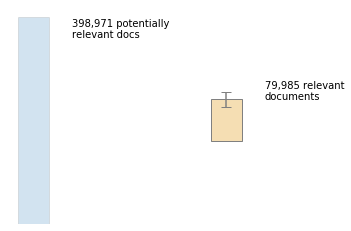

In [4]:
fig, ax = plt.subplots()

h = df.shape[0]
ax.bar(0,h,alpha=0.2,edgecolor="grey")
ax.text(1,h*0.9,f"{h:,} potentially\nrelevant docs")

nr = df.loc[df['0 - relevance - mean_prediction']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
ur = df.loc[df['0 - relevance - upper_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
lr = df.loc[df['0 - relevance - lower_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]

ax.errorbar(
    5,df.shape[0]*0.5-nr*0.5+nr,
    yerr = [[nr-lr],[ur-nr]],
    capsize=5,c="grey"
)

h = df.shape[0]*0.5+nr*0.5
ax.bar(
    5,nr,bottom=df.shape[0]*0.5-nr*0.5,
    color="wheat",edgecolor="grey"
)
ax.text(6,h, f"{nr:,} relevant\ndocuments")

ax.axis("off")

ax.set_xlim(xmax=8)

plt.savefig('../plots/process_diagram/relevant.pdf',bbox_to_inches="tight")
plt.savefig('../plots/process_diagram/relevant.png',bbox_to_inches="tight")

12 - Coastal and marine Ecosystems - mean_prediction
12834
13007.0 14186.0 7827.0
12 - Human and managed - mean_prediction
9542
9791.0 10468.0 5623.0
12 - Mountains, snow and ice - mean_prediction
4789
4948.0 5043.0 3390.0
12 - Rivers, lakes, and soil moisture - mean_prediction
12164
12456.0 13580.0 7922.0
12 - Terrestrial ES - mean_prediction
30677
31119.0 33394.0 19408.0


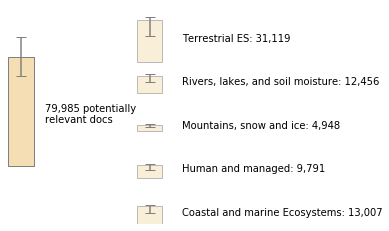

In [8]:
fig, ax = plt.subplots()
h = nr
ax.bar(0,h,color="wheat",edgecolor="grey",bottom=h*0.5)

ax.errorbar(
    0,nr*0.5+nr,
    yerr = [[nr-lr],[ur-nr]],
    capsize=5,c="grey"
)

ax.text(0.75,h*0.9,f"{h:,} potentially\nrelevant docs")
ax.set_xlim(xmax=10)
ax.axis("off")

for i,c in enumerate(pred_cats):
    print(c)
    n = cdf.loc[(cdf['0 - relevance - mean_prediction']>=0.5) & (cdf[c]>=0.5)].shape[0] 
    n = cdf.loc[(cdf[c]>=0.5)].shape[0] 
    print(n)
    c_actual = c.replace(' - mean_prediction','')
    
    cur = cdf.loc[(cdf['0 - relevance - upper_pred']>=0.5) & (cdf[c.replace('mean_prediction','upper_pred')]>=0.5),].shape[0]
    clr = cdf.loc[(cdf['0 - relevance - lower_pred']>=0.5) & (cdf[c.replace('mean_prediction','lower_pred')]>=0.5),].shape[0]
    
    
    n += cdf[c_actual].sum()
    cur += cdf[c_actual].sum()
    clr += cdf[c_actual].sum()
    
    print(n, cur, clr)
    bottom = i*(h*2/len(pred_cats))-n*0.5+h*0.05
    ax.bar(4, n,bottom=bottom,alpha=0.5,edgecolor="grey",color="wheat")
    ax.errorbar(4,bottom+n,yerr=[[n-clr],[cur-n]],capsize=5,c="grey")
    
    ax.text(5,bottom+n/2,f"{c.split(' - ')[1]}: {n:,.0f}" )
    
plt.savefig('../plots/process_diagram/relevant_cats.pdf')


In [ ]:
n

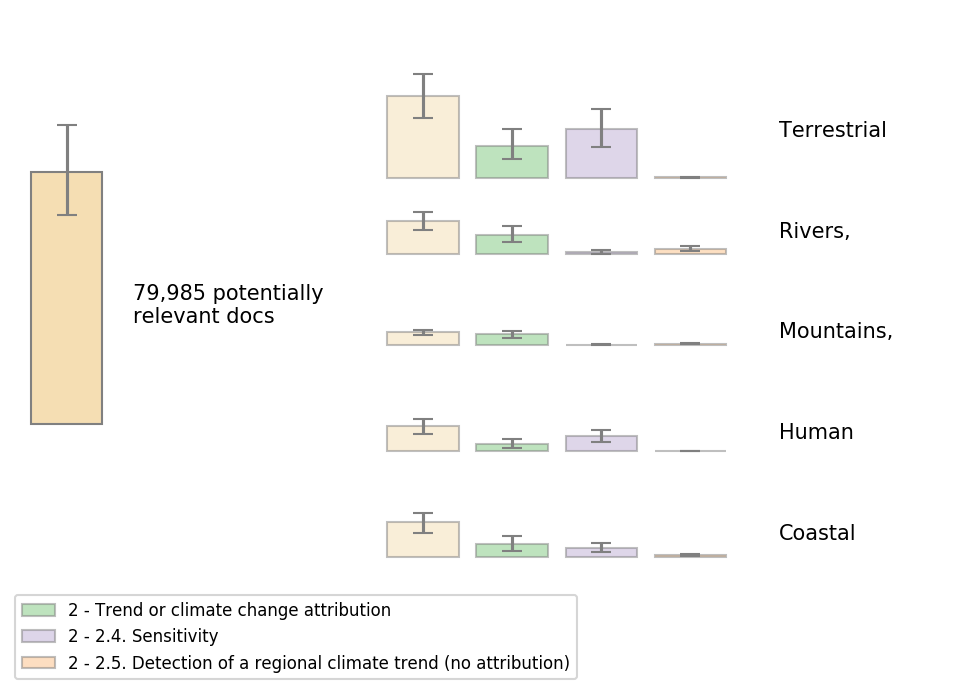

In [24]:
fig, ax = plt.subplots(dpi=150, figsize=(8,5))


nr = df.loc[df['0 - relevance - mean_prediction']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
ur = df.loc[df['0 - relevance - upper_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
lr = df.loc[df['0 - relevance - lower_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
h = nr
ax.bar(0,h,color="wheat",edgecolor="grey",bottom=h*0.5)

ax.errorbar(
    0,nr*0.5+nr,
    yerr = [[nr-lr],[ur-nr]],
    capsize=5,c="grey"
)

ax.text(0.75,h*0.9,f"{h:,} potentially\nrelevant docs")
ax.set_xlim(xmax=10)
ax.set_ylim(ymin=-10000)
ax.set_ylim(ymax=170000)
ax.axis("off")

colors = ['#7fc97f','#beaed4','#fdc086']

for i,c in enumerate(pred_cats):
    
    
    n = cdf.loc[(cdf['0 - relevance - mean_prediction']>=0.5) & (cdf[c]>=0.5)].shape[0] 
    c_actual = c.replace(' - mean_prediction','')
    
    cur = cdf.loc[(cdf['0 - relevance - upper_pred']>=0.5) & (cdf[c.replace('mean_prediction','upper_pred')]>=0.5),].shape[0]
    clr = cdf.loc[(cdf['0 - relevance - lower_pred']>=0.5) & (cdf[c.replace('mean_prediction','lower_pred')]>=0.5),].shape[0]
    
    n += cdf[c_actual].sum()
    bottom = i*(h*2/len(pred_cats))-n*0.5+h*0.04
    ax.bar(4, n,bottom=bottom,alpha=0.5,edgecolor="grey",color="wheat")
    ax.errorbar(4,bottom+n,yerr=[[n-clr],[cur-n]],capsize=5,c="grey")
    c_actual = c.replace(' - prediction','')
    ax.text(8,bottom+n/2,f"{c.split(' - ')[1].split()[0]}" )
    
    for j, ac in enumerate(attrib_cats):
        
        n = cdf.loc[(cdf['0 - relevance - mean_prediction']>=0.5) & (cdf[c]>=0.5) & (cdf[ac]>=0.5)].shape[0] 
        c_actual = ac.replace(' - mean_prediction','')

        acur = cdf.loc[(cdf['0 - relevance - upper_pred']>=0.5) & (cdf[c.replace('mean_prediction','upper_pred')]>=0.5) & (cdf[ac.replace('mean_prediction','upper_pred')]>=0.5),].shape[0]
        aclr = cdf.loc[(cdf['0 - relevance - lower_pred']>=0.5) & (cdf[c.replace('mean_prediction','lower_pred')]>=0.5) & (cdf[ac.replace('mean_prediction','lower_pred')]>=0.5),].shape[0]
        if i==0:
            ax.bar(5+j,n,bottom=bottom, color=colors[j],alpha=0.5, edgecolor="grey",label=c_actual)
        else:
            ax.bar(5+j,n,bottom=bottom, color=colors[j],alpha=0.5, edgecolor="grey")
        ax.errorbar(5+j,bottom+n,yerr=[[n-aclr],[acur-n]],capsize=5,c="grey")
        
            


ax.legend(fontsize=8, bbox_to_anchor=(0.6,-0.01),ncol=1) 
#fig.tight_layout()
plt.savefig('../plots/process_diagram/relevant_cats_attrib.pdf',bbox_to_inches="tight")
plt.savefig('../plots/process_diagram/relevant_cats_attrib.png',bbox_to_inches="tight")


In [27]:
ac

'2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction'

In [31]:
qs = cdf.loc[
    (cdf['2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction']>0.5) & 
    (cdf['12 - Terrestrial ES - mean_prediction']>0.5)
]
print(qs.shape)
for i, row in qs.head().iterrows():
    print(row['title'])
    print(row['content'])

(134, 299)
Studying drought phenomena in the Continental United States in 2011 and 2012 using various drought indices
Numerous drought indices have been developed to monitor drought conditions. However, different drought indices have differing characteristics, and are suitable for specific environments. The aim of this study was to compare the occurrence of drought, as detected by remote sensing across the Continental United States (CONUS). We used drought events during 2011 and 2012 to compare various indices developed for the study of drought phenomena. Three in situ drought indices, the Palmer drought severity index (PDSI), Z-index and standardized precipitation indices (SPI) with different time scales were used to evaluate drought conditions in different climate divisions. The drought indices compared in this study include the vegetation condition index (VCI), the temperature condition index (TCI), the perpendicular drought index (PDI) and modified PDI (MPDI) derived from moderate-

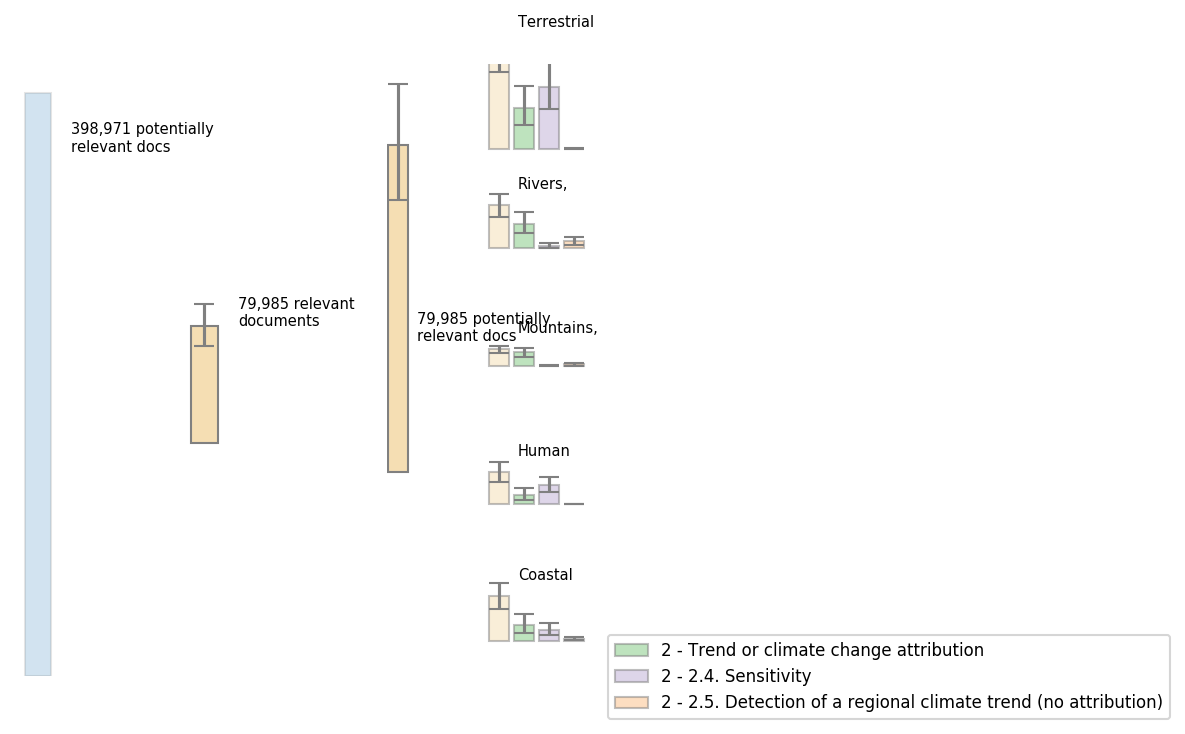

In [21]:
fig, axs = plt.subplots(1,2,dpi=150,figsize=(8,5))

ax = axs[0]

h = df.shape[0]
ax.bar(0,h,alpha=0.2,edgecolor="grey")
ax.text(1,h*0.9,f"{h:,} potentially\nrelevant docs", fontsize=7)

nr = df.loc[df['0 - relevance - mean_prediction']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
ur = df.loc[df['0 - relevance - upper_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
lr = df.loc[df['0 - relevance - lower_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]

ax.errorbar(
    5,df.shape[0]*0.5-nr*0.5+nr,
    yerr = [[nr-lr],[ur-nr]],
    capsize=5,c="grey"
)

h = df.shape[0]*0.5+nr*0.5
ax.bar(
    5,nr,bottom=df.shape[0]*0.5-nr*0.5,
    color="wheat",edgecolor="grey"
)
ax.text(6,h, f"{nr:,} relevant\ndocuments", fontsize=7)

ax.axis("off")

ax = axs[1]

nr = df.loc[df['0 - relevance - mean_prediction']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
ur = df.loc[df['0 - relevance - upper_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
lr = df.loc[df['0 - relevance - lower_pred']>=0.5].shape[0] + cdf.query('relevant==1').shape[0]
h = nr
ax.bar(0,h,color="wheat",edgecolor="grey",bottom=h*0.5)

ax.errorbar(
    0,nr*0.5+nr,
    yerr = [[nr-lr],[ur-nr]],
    capsize=5,c="grey"
)

ax.text(0.75,h*0.9,f"{h:,} potentially\nrelevant docs", fontsize=7)
ax.set_xlim(xmax=10)
ax.set_ylim(ymin=-10000)
ax.axis("off")

colors = ['#7fc97f','#beaed4','#fdc086']

for i,c in enumerate(pred_cats):
    
    
    n = cdf.loc[(cdf['0 - relevance - mean_prediction']>=0.5) & (cdf[c]>=0.5)].shape[0] 
    c_actual = c.replace(' - mean_prediction','')
    
    cur = cdf.loc[(cdf['0 - relevance - upper_pred']>=0.5) & (cdf[c.replace('mean_prediction','upper_pred')]>=0.5),].shape[0]
    clr = cdf.loc[(cdf['0 - relevance - lower_pred']>=0.5) & (cdf[c.replace('mean_prediction','lower_pred')]>=0.5),].shape[0]
    
    n += cdf[c_actual].sum()
    bottom = i*(h*2/len(pred_cats))-n*0.5+h*0.05
    ax.bar(4, n,bottom=bottom,alpha=0.5,edgecolor="grey",color="wheat")
    ax.errorbar(4,bottom+n,yerr=[[n-clr],[cur-n]],capsize=5,c="grey")
    c_actual = c.replace(' - prediction','')
    ax.text(4.75,bottom+n+h*0.05,f"{c.split(' - ')[1].split()[0]}", fontsize=7)
    
    for j, ac in enumerate(attrib_cats):
        
        n = cdf.loc[(cdf['0 - relevance - mean_prediction']>=0.5) & (cdf[c]>=0.5) & (cdf[ac]>=0.5)].shape[0] 
        c_actual = ac.replace(' - mean_prediction','')

        acur = cdf.loc[(cdf['0 - relevance - upper_pred']>=0.5) & (cdf[c.replace('mean_prediction','upper_pred')]>=0.5) & (cdf[ac.replace('mean_prediction','upper_pred')]>=0.5),].shape[0]
        aclr = cdf.loc[(cdf['0 - relevance - lower_pred']>=0.5) & (cdf[c.replace('mean_prediction','lower_pred')]>=0.5) & (cdf[ac.replace('mean_prediction','lower_pred')]>=0.5),].shape[0]
        if i==0:
            ax.bar(5+j,n,bottom=bottom, color=colors[j],alpha=0.5, edgecolor="grey",label=c_actual)
        else:
            ax.bar(5+j,n,bottom=bottom, color=colors[j],alpha=0.5, edgecolor="grey")
        ax.errorbar(5+j,bottom+n,yerr=[[n-aclr],[acur-n]],capsize=5,c="grey")
        

ax.legend(fontsize=8, bbox_to_anchor=(1,0.08),ncol=1) 
fig.tight_layout()

ax.set_xlim(xmax=8)

plt.savefig('../plots/process_diagram/relevant_cats_attrib_panel.pdf',bbox_to_inches="tight")
plt.savefig('../plots/process_diagram/relevant_cats_attrib_panel.png',bbox_to_inches="tight")